## Model the Discount Lift Tradeoff 
- Given the LTR, or N-day collections, calculate the lift required to profitably offset the discount

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Read in Data from SQL query

In [24]:
df = pd.read_csv('./synthetic_LTR_data.csv')
df

,Date,Customer ID,Product Offer,Synthetic_LTR
0,1/1/22,1,Product 1,13.544894
1,1/1/22,2,Product 1,455.846786
2,1/1/22,3,Product 1,339.245931
3,1/1/22,4,Product 1,329.071027
4,1/1/22,5,Product 1,192.692975
...,...,...,...,...
30459,12/30/22,30460,Product 2,47.471944
30460,12/30/22,30461,Product 2,451.569869
30461,12/31/22,30462,Product 1,176.400168
30462,12/31/22,30463,Product 2,485.905254


In [39]:
results = df.groupby('Product Offer').mean()['Synthetic_LTR']
results.drop(index='0',inplace=True)
results['Product 1'] = results['Product 1'] - 50  ## make the LTR differences a bit more drastic
results['Product 5'] = results['Product 5'] + 70  ## make the LTR differences a bit more drastic
results

Product Offer
Product 1    188.422668
Product 2    250.232911
Product 3    242.858781
Product 4    223.704507
Product 5    323.047284
Name: Synthetic_LTR, dtype: float64

## Draw Discount Curves

Product Offer =  Product 1 188.42266836707327
Product Offer =  Product 2 250.23291117680967
Product Offer =  Product 3 242.858780709772
Product Offer =  Product 4 223.70450738200296
Product Offer =  Product 5 323.0472844334244


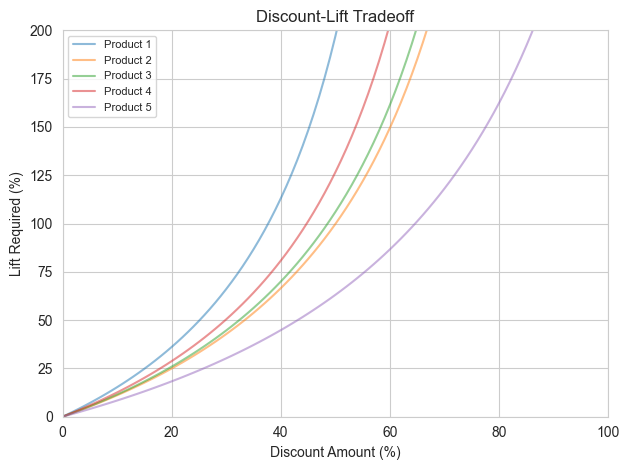

In [40]:
## Define function that returns the lift required
def get_lift(LTR,D):
    value = (LTR/(LTR-D)-1)*100
    if value < 0:
        return np.nan
    else:
        return value

## Create array to discount from 0% to 100%
discounts = np.linspace(0,100,101)


## For each product offer and discount amount, calculate the lift required
for i in results.index:
    LTR = results[i]
    lift = []
    print('Product Offer = ',i,LTR)
    for D in discounts:
        discount_dollar = D/100*250 ## convert to dollar amount. Note, the product is $120 for all segments.
        lift_required = get_lift(LTR,discount_dollar)
        lift.append(lift_required)

    ## Plot discount-lift curve for each product
    plt.plot(discounts,lift,label=i,alpha=0.5)

plt.xlabel('Discount Amount (%)')
plt.xlim(0,100)
plt.ylim(0,200)
plt.ylabel('Lift Required (%)')
plt.title('Discount-Lift Tradeoff')
plt.legend(loc='upper left',fontsize=8)
plt.tight_layout()
plt.savefig('./discount_lift_tradeoff_synthetic.png',dpi=400)
plt.show()